In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from pandas import read_csv
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn import preprocessing
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
import random
import math
from sklearn.impute import SimpleImputer

plt.style.use('ggplot')

In [2]:
data = "iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petalwidth',
         'class']
dataset = read_csv(data, names=names)

In [3]:
rows, col = dataset.shape
print("Rows : %s, column : %s" % (rows, col))

# Create Arrays for Features and Classes
array = dataset.values
X = array[:, 0:4] # contains flower features (petal length, etc..)
y = array[:, 4]  # contains flower names

#X

Rows : 150, column : 5


In [4]:
#y
target_df = pd.DataFrame(y, columns = ['Column_A'])
#target_df

In [5]:
# Encoding process
array_2 = preprocessing.LabelEncoder()
array_2.fit(y)

LabelEncoder()

In [6]:
# Split Data into 2 Folds for Training and Test
X_train, X_test, y_train, y_test = train_test_split(
    X, array_2.transform(y), test_size=0.50, random_state=1)

# New variables
X_train_2 = X_test
y_train_2 = y_test

X_test_2 = X_train
y_test_2 = y_train

## Part 1 : Decision Tree

In [7]:
# Decision Tree Classifier
dclf = DecisionTreeClassifier()
dclf.fit(X_train, y_train)
# print(tree.plot_tree(dclf))
dclfPrediction_1 = (dclf.predict(X_test)).round()
dclf.fit(X_train_2, y_train_2)
# print(tree.plot_tree(dclf))
dclfPrediction_2 = (dclf.predict(X_test_2)).round()

actual = np.concatenate([y_test, y_test_2])  # type: ignore
predicted = (np.concatenate([dclfPrediction_1, dclfPrediction_2])).round()

print("*******************DTC***********************************")
print(f"\nAccurace score: " + str(accuracy_score(actual, predicted)))
print(f"\nConfusion matrix:\n " + str(confusion_matrix(actual, predicted)))
print(f"\nFeature names:", names[0:4])

*******************DTC***********************************

Accurace score: 0.9533333333333334

Confusion matrix:
 [[50  0  0]
 [ 0 48  2]
 [ 0  5 45]]

Feature names: ['sepal-length', 'sepal-width', 'petal-length', 'petalwidth']


## Part 2 : PCA

In [8]:
#Trying a different way to approach the problems here on
#Loading the dataset
iris_dataset = datasets.load_iris()
df = pd.DataFrame(iris_dataset.data, columns = iris_dataset.feature_names)  # type: ignore
target_column =  iris_dataset.target_names  # type: ignore
target_flower_name = pd.DataFrame(target_column, columns = ['Flower names'])
#target_flower_name

In [9]:
kfold = model_selection.KFold(n_splits=2, random_state=1,shuffle=True)

In [10]:
X = iris_dataset.data
y = iris_dataset.target

In [11]:
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [12]:
# Make an instance of the Model
pca = PCA(4)
pca = PCA(n_components=4, random_state=2020)
pca.fit(X)
#principleComponents = pca.transform(X)

# Get eigenvectors and eigenvalues
eigenvectors = pca.components_
eigenvalues = pca.explained_variance_

In [13]:
PoV=max(pca.explained_variance_)/sum(pca.explained_variance_)

data_scaled = pd.DataFrame(preprocessing.scale(df),columns = df.columns) 
scaled_data = pca.fit_transform(data_scaled)

col = pca.fit_transform(data_scaled)
col1 = pd.DataFrame(col, columns = df.columns)

In [14]:
print('Features:',pd.DataFrame(pca.components_,columns=data_scaled.columns,index = ['Z-1','Z-2', 'Z-3', 'Z-3']))
print("Features: ", col1.columns)

Features:      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
Z-1           0.521066         -0.269347           0.580413          0.564857
Z-2           0.377418          0.923296           0.024492          0.066942
Z-3          -0.719566          0.244382           0.142126          0.634273
Z-3          -0.261286          0.123510           0.801449         -0.523597
Features:  Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')


Variance explained by all 4 components:  99.99999999999999


<module 'matplotlib.pyplot' from 'c:\\Users\\RUDRO\\AppData\\Local\\Programs\\Python\\Python39\\lib\\site-packages\\matplotlib\\pyplot.py'>

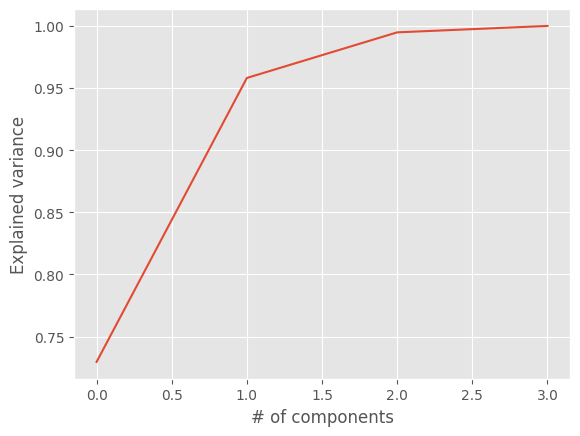

In [15]:
print("Variance explained by all 4 components: ", sum(pca.explained_variance_ratio_ * 100))
pca.explained_variance_ratio_

#plot graph
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('# of components')
plt.ylabel('Explained variance')
plt

In [16]:
print("Part 2:")
print("Variance explained by First component =", np.cumsum(pca.explained_variance_ratio_ * 100)[0])
print("Variance explained by Second component =", np.cumsum(pca.explained_variance_ratio_ * 100)[1])
print("Variance explained by Third component =", np.cumsum(pca.explained_variance_ratio_ * 100)[2])
print("Variance explained by Fourth component =", np.cumsum(pca.explained_variance_ratio_ * 100)[3])
print(f"Eigenvalue = {eigenvalues}")
print(f"Eigenvectors = {eigenvectors}")
print('Pov=', PoV)

Part 2:
Variance explained by First component = 72.96244541329985
Variance explained by Second component = 95.81320720000164
Variance explained by Third component = 99.48212908928451
Variance explained by Fourth component = 99.99999999999999
Eigenvalue = [4.22824171 0.24267075 0.0782095  0.02383509]
Eigenvectors = [[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [ 0.65658877  0.73016143 -0.17337266 -0.07548102]
 [-0.58202985  0.59791083  0.07623608  0.54583143]
 [-0.31548719  0.3197231   0.47983899 -0.75365743]]
Pov= 0.9246187232017271


In [17]:
clf = DecisionTreeClassifier()
clf.fit(data_scaled, iris_dataset.target)

expected = iris_dataset.target.tolist()  # type: ignore
#print(expected)
scores = cross_val_score(clf, data_scaled,iris_dataset.target, cv=kfold)  # type: ignore
y_pred = cross_val_predict(clf,data_scaled,iris_dataset.target, cv=kfold).tolist()  # type: ignore
#print(y_pred)

In [18]:
print('Accuracy= ', accuracy_score(expected, y_pred))
print('Confusion matrix= \n', confusion_matrix(expected, y_pred))

Accuracy=  0.9533333333333334
Confusion matrix= 
 [[50  0  0]
 [ 0 45  5]
 [ 0  2 48]]


## Part 3: Simulated Annealing

In [19]:
data2_B = pd.DataFrame(data= np.c_[col1])

new_features_8 = pd.concat([df, col1], axis=1)
print('Shape of data =',new_features_8.shape)

print('Total 8 features:',new_features_8.head()) 

Shape of data = (150, 8)
Total 8 features:    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  
0          -2.264703          0.480027          -0.127706         -0.024168  
1          -2.080961         -0.674134          -0.234609         -0.103007  
2          -2.364229         -0.341908           0.044201         -0.028377  
3          -2.299384         -0.597395           0.091290          0.065956  
4          -2.389842          0.646835           0.015738          0.035923  


In [20]:
past_acc = 1

for x in range(100):
    rn = random.randint(2, 5)
    m = (rn/100)*32
    
    pn = random.random()

    # Decision Trees
    model_dt= DecisionTreeClassifier()
    model_dt.fit(new_features_8, iris_dataset.target)

    print('**********************')
    # make predictions
    expected = iris_dataset.target
    scores = cross_val_score(
        model_dt, new_features_8, iris_dataset.target, cv=kfold)
    y_pred = cross_val_predict(
        model_dt, new_features_8, iris_dataset.target, cv=kfold)
    
    Accuracy = accuracy_score(expected, y_pred)
    print('Accuracy= ', accuracy_score(expected, y_pred))
    conf_matrix_val = confusion_matrix(expected, y_pred)
    print('Confusion Matrix')
    print(conf_matrix_val)
    remove_n = round(m)

    if Accuracy > past_acc:
        print('Status:Improved')
        #print('Accuracy', Accuracy)
        new_features_81 = new_features_8[new_features_8.columns.to_series().sample(
            int((8+remove_n)/2))]
        print('Features', new_features_81.head())
        print('shape', new_features_81.shape)
        print(' ')

    else:

        acc_prob = math.exp(-x*(past_acc-Accuracy)/past_acc)
        print('Pr[accept]=', acc_prob)
        print('Random uniform:', pn)
        
        past_acc = Accuracy
        
        remove_n = round(m)
        if pn > acc_prob:
            new_features_81 = new_features_8[new_features_8.columns.to_series().sample(
                int((8-remove_n)/2))]
            #print('feature reject')
            print('Status:Discarded')
            print('Features', new_features_81.head())
            print('final shape', new_features_81.shape)
            print(' ')
        else:
            new_features_81 = new_features_8[new_features_8.columns.to_series().sample(
                int((8+remove_n)/2))]
            #print('feature accepted')
            print('Status:Accepted')
            print('Features', new_features_81.head())
            print('final shape', new_features_81.shape)
            print(' ')

**********************
Accuracy=  0.9066666666666666
Confusion Matrix
[[50  0  0]
 [ 0 47  3]
 [ 0 11 39]]
Pr[accept]= 1.0
Random uniform: 0.1365585421031823
Status:Accepted
Features    petal length (cm)  petal length (cm)  sepal length (cm)  sepal length (cm)  \
0                1.4          -0.127706                5.1          -2.264703   
1                1.4          -0.234609                4.9          -2.080961   
2                1.3           0.044201                4.7          -2.364229   
3                1.5           0.091290                4.6          -2.299384   
4                1.4           0.015738                5.0          -2.389842   

   petal length (cm)  petal length (cm)  sepal width (cm)  sepal width (cm)  
0                1.4          -0.127706               3.5          0.480027  
1                1.4          -0.234609               3.0         -0.674134  
2                1.3           0.044201               3.2         -0.341908  
3                1

## Part 4: Genetic Algorithm

In [21]:
print('Part 3:Genetic algorithm ')

p4_feature = np.concatenate((iris_dataset.data, col), axis=1)

data = pd.DataFrame.from_records(p4_feature)
data.columns = ['sepal-length', 'sepal-width', 'petal-length',
                'petal-width', 'lambda1', 'lambda2', 'lambda3', 'lambda4']  # type: ignore

set1 = data.filter(['lambda1', 'sepal-length', 'sepal-width',
                   'petal-length', 'petal-width'], axis=1)
set2 = data.filter(['lambda1', 'lambda2', 'sepal-width',
                   'petal-length', 'petal-width'], axis=1)
set3 = data.filter(['lambda1', 'lambda2', 'lambda3',
                   'sepal-width', 'petal-length'], axis=1)
set4 = data.filter(['lambda1', 'lambda2', 'lambda3',
                   'lambda4', 'sepal-width'], axis=1)
set5 = data.filter(['lambda1', 'lambda2', 'lambda3',
                   'lambda4', 'sepal-length'], axis=1)
population = [set1, set2, set3, set4, set5]

Part 3:Genetic algorithm 


In [22]:
for yy in range(50):
    
    # union
    u1 = set1.merge(set2)
    u2 = set1.merge(set3)
    u3 = set1.merge(set4)
    u4 = set1.merge(set5)
    u5 = set2.merge(set3)
    u6 = set2.merge(set4)
    u7 = set2.merge(set5)
    u8 = set3.merge(set4)
    u9 = set3.merge(set4)
    u10 = set4.merge(set5)

    # intersection
    inter1 = pd.concat([set1, set2], join='inner')
    inter2 = pd.concat([set1, set3], join='inner')
    inter3 = pd.concat([set1, set4], join='inner')
    inter4 = pd.concat([set1, set5], join='inner')
    inter5 = pd.concat([set2, set3], join='inner')
    inter6 = pd.concat([set2, set4], join='inner')
    inter7 = pd.concat([set2, set5], join='inner')
    inter8 = pd.concat([set3, set4], join='inner')
    inter9 = pd.concat([set3, set5], join='inner')
    inter10 = pd.concat([set4, set5], join='inner')

    # random select one feature
    df1 = data.sample(axis='columns')
    df2 = data.sample(axis='columns')
    df3 = data.sample(axis='columns')
    df4 = data.sample(axis='columns')
    
    mut = [df1, df2]
    mut2 = [df3, df4]

    for x in range(25):
        aa = random.choice(mut)
        bb = random.choice(mut2)
        
        population2 = [set1, set2, set3, set4, set5, u1, u2, u3, u4, u5, u6, u7, u8, u9, u10,
                       inter1, inter2, inter3, inter4, inter5, inter6, inter7, inter8, inter9, inter10]
        

        # mutation add
        population2[x]['key'] = 1
        aa['key'] = 1
        bb['key'] = 1

        union_mut = pd.merge(
            population2[x], aa, on='key', how='left').drop("key", axis = 1)  # type: ignore

        # mutation delete
        diff_3 = population2[x][~population2[x].isin(aa)].drop("key", axis = 1)  # type: ignore
        diff_mut = diff_3.dropna(how='all', axis=1)

        # mutation replace
        diff_4 = population2[x][~population2[x].isin(aa)].drop("key", axis = 1)  # type: ignore
        diff_mut1 = diff_4.dropna(how='all', axis=1)
        diff_mut1['key'] = 1
        rep_mut = pd.merge(diff_mut1, bb, on='key').drop("key", axis = 1)  # type: ignore

        final_set = [union_mut, diff_mut, rep_mut]
        final_random = random.choice(final_set)

        ff = final_random.sample(150)

        imp = SimpleImputer(missing_values=np.nan, strategy='mean')
        imp = imp.fit(ff)

        # Impute our data, then train
        X_train_imp = imp.transform(ff)
        
        model_tree = DecisionTreeClassifier()
        model_tree.fit(X_train_imp, iris_dataset.target)
        # make predictions
        expected = iris_dataset.target
        scores9 = cross_val_score(
            model_tree, X_train_imp, iris_dataset.target, cv=kfold)
        y_pred9 = cross_val_predict(
            model_tree, X_train_imp, iris_dataset.target, cv=kfold)
        
    print('Accuracy= ', accuracy_score(expected, y_pred))
    conf_mat = confusion_matrix(expected, y_pred)
    print('Confusion Matrix')
    print(conf_mat)
    print('Dataset shape=', ff.shape)
    
    print('Features', ff.head())
    print('final shape', X_train_imp.shape)
    print('   ')


Accuracy=  0.92
Confusion Matrix
[[50  0  0]
 [ 0 46  4]
 [ 0  8 42]]
Dataset shape= (150, 5)
Features         lambda1   lambda2   lambda3   lambda4  sepal-width
17648  2.426329  2.556661 -0.127881  0.273807          2.5
36567 -0.362183 -2.019238  0.105821 -0.019571          3.8
41586  1.020951  0.064346  0.337716  0.008654          3.5
4603  -2.140122 -0.504541 -0.075008  0.048189          2.9
5072  -2.446177  2.150728 -0.082668  0.048214          2.8
final shape (150, 5)
   
Accuracy=  0.92
Confusion Matrix
[[50  0  0]
 [ 0 46  4]
 [ 0  8 42]]
Dataset shape= (150, 5)
Features         lambda1   lambda2   lambda3   lambda4  sepal-length
26672 -2.168577  0.527150 -0.206816 -0.010275           7.7
2589  -2.190350  0.488838 -0.044215 -0.093090           5.1
41301  1.954327  1.007778 -0.419985  0.218338           6.4
42798  2.798770  0.856803 -0.542906 -0.295881           5.3
24776 -2.262215  2.686284  0.030527 -0.050534           5.0
final shape (150, 5)
   
Accuracy=  0.92
Confusion Matr